<a href="https://colab.research.google.com/github/oxanaRC/CE902/blob/main/Data_exploration_and_Random_forest_test120721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12.07.21
Joining property sales dataset with local schools data (number of secondary schools in radius of 6 km and disadvantage pupils score).
RF on a subset of data (Colchester, Chelmsford, Ipswich, Bury St Edmunds and Uttlesford areas for 6 months - Jan, Feb, Mar, Apr, May, June 2018) - comparing RMSE for predictions obtained from data withiot disadvantage score and with)


In [1]:
!pip install harperdb

In [2]:
import harperdb
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
url='https://ce901data-orc0770.harperdbcloud.com'
db=harperdb.HarperDB(url=url,
            username='myuser',
            password='abcdef',
            timeout=500)

In [4]:
db

Below data is extracted from the SQL database, however because of poor performance of the JOIN SQL operations, instead of relational SQL statements, the JOIN operations are performed in pandas DataFrames (according to https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).


The data extraction from SQL tables in placed within the loop to avoid the database timeout issues.


In [5]:
list_of_dfs = {}
count=0
for mt in range(1, 7):
  for yr in range (2018,2019):
    year=yr
    month=mt
    count=count+1
    #sqlstring1='SELECT bedrooms.id, bedrooms.num_of_beds, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date '
    #sqlstring2='FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE (num_of_beds>0 and deed_date LIKE "%{}/{}")'
    #sqlstring2='FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE deed_date LIKE "%{}/{}"'
    #sqlstring=sqlstring1+sqlstring2
    sqlstring='SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%{}/{}"'
    sqlstring=sqlstring.format(month,year)
    print(sqlstring)
    my_db_data=db.sql(sqlstring)
    list_of_dfs[count] = pd.DataFrame(my_db_data)
    print(list_of_dfs[count].shape)
    #masterDF = masterDF.append(list_of_dfs[count])
df_prop_sales = pd.concat(list_of_dfs, sort=False)
df_prop_sales

SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%1/2018"
(169065, 8)
SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%2/2018"
(157760, 8)
SELECT propertypurchases.unique_id, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type, propertypurchases.deed_date, propertypurchases.postcode FROM projectdata.propertypurchases WHERE deed_date LIKE "%3/2018"
(84147, 8)
SELECT propertypurchases.unique_id, propertypurchases

unique_id  price_paid  ...   deed_date  postcode
1 0      64342BFD-ABA7-422C-E053-6C04A8C0FB8A     1740000  ...  11/01/2018    E8 4NE
  1      64342BFD-ABAA-422C-E053-6C04A8C0FB8A     1525000  ...  19/01/2018    N5 1BZ
  2      64342BFD-ABAB-422C-E053-6C04A8C0FB8A     3306000  ...  17/01/2018   W11 1NZ
  3      64342BFD-ABAC-422C-E053-6C04A8C0FB8A      442000  ...  04/01/2018   IG3 9NB
  4      64342BFD-ABB0-422C-E053-6C04A8C0FB8A     1375000  ...  12/01/2018   W12 8JN
...                                       ...         ...  ...         ...       ...
6 95763  C18F412B-A17C-81A6-E053-6B04A8C0AD18     1000000  ...  25/06/2018   E11 4AR
  95764  C18F412B-A5C6-81A6-E053-6B04A8C0AD18       83000  ...  08/06/2018   HR3 6AL
  95765  C18F412B-A9D4-81A6-E053-6B04A8C0AD18      165000  ...  26/06/2018   PR4 3ZH
  95766  C18F412B-B07A-81A6-E053-6B04A8C0AD18        7500  ...  20/06/2018  NN15 6JP
  95767  C18F412B-B90A-81A6-E053-6B04A8C0AD18       50000  ...  14/06/2018   DH5 9QT

[660319 rows x 8 columns]

In [6]:
sqlstring='SELECT bedrooms.id, bedrooms.num_of_beds FROM projectdata.bedrooms WHERE num_of_beds>0'
bedrooms=db.sql(sqlstring)
df_bedrooms=pd.DataFrame(bedrooms)
df_bedrooms.rename(columns = {'id':'unique_id'}, inplace = True)
df_bedrooms

,unique_id,num_of_beds
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1
...,...,...
258369,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16
258370,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17
258371,64342BFF-158B-422C-E053-6C04A8C0FB8A,23
258372,75050A86-10FB-9A88-E053-6B04A8C02390,46


In [68]:
#sqlstring='SELECT bedrooms.id, bedrooms.num_of_beds, propertypurchases.price_paid, propertypurchases.town, propertypurchases.district, propertypurchases.estate_type, propertypurchases.property_type FROM projectdata.bedrooms LEFT OUTER JOIN projectdata.propertypurchases ON bedrooms.id=propertypurchases.unique_id WHERE num_of_beds>0'
#my_db_data=db.sql(sqlstring)
#data=pd.DataFrame(my_db_data)
data = pd.merge(df_bedrooms, df_prop_sales, how="left", on="unique_id")
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN
...,...,...,...,...,...,...,...,...,...
258369,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ
258370,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA
258371,64342BFF-158B-422C-E053-6C04A8C0FB8A,23,80000.0,WOLVERHAMPTON,WOLVERHAMPTON,F,T,12/01/2018,WV2 4NA
258372,75050A86-10FB-9A88-E053-6B04A8C02390,46,564072.0,BLACKPOOL,BLACKPOOL,F,O,01/05/2018,FY2 9SX


In [69]:
#check rows where postcode is NAN - these are the result of rows added on the Join with bedrooms data where bedrooms data is for sale happened after the considered period
#data_t=data[ (data['postcode'].isnull()) ]
#drop NAN rows from data
data=data.dropna(subset=['postcode'])     
data 

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN
...,...,...,...,...,...,...,...,...,...
258369,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ
258370,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA
258371,64342BFF-158B-422C-E053-6C04A8C0FB8A,23,80000.0,WOLVERHAMPTON,WOLVERHAMPTON,F,T,12/01/2018,WV2 4NA
258372,75050A86-10FB-9A88-E053-6B04A8C02390,46,564072.0,BLACKPOOL,BLACKPOOL,F,O,01/05/2018,FY2 9SX


In [50]:
#Extracting sales postcodes mappings to school postcodes 
#sqlstring='SELECT sales_pc_to_school_ps_map.sales_postcode,  sales_pc_to_school_ps_map.urn, sales_pc_to_school_ps_map.distance, sales_pc_to_school_ps_map.disadv_prct, sales_pc_to_school_ps_map.aver_attain_eng , sales_pc_to_school_ps_map.aver_attain_math FROM projectdata. sales_pc_to_school_ps_map '
#local_schools=db.sql(sqlstring)
#df_local_schools=pd.DataFrame(local_schools)
#df_local_schools

list_of_dfs_sm = {}
my_range_a=0
count=0
for x in range(1, 30):
    my_range_b=x*3000
    my_range_a=my_range_b-3000
    count=count+1
    sqlstring='SELECT sales_pc_to_school_ps_map.sales_postcode,  sales_pc_to_school_ps_map.urn, sales_pc_to_school_ps_map.distance, sales_pc_to_school_ps_map.disadv_prct, sales_pc_to_school_ps_map.aver_attain_eng , sales_pc_to_school_ps_map.aver_attain_math FROM projectdata. sales_pc_to_school_ps_map  WHERE count_p >= {} and count_p <{}'
    sqlstring=sqlstring.format(my_range_a,my_range_b)
    print(sqlstring)
    my_db_data=db.sql(sqlstring)
    list_of_dfs_sm[count] = pd.DataFrame(my_db_data)
    print(list_of_dfs_sm[count].shape)
df_local_schools = pd.concat(list_of_dfs_sm, sort=False)
df_local_schools


SELECT sales_pc_to_school_ps_map.sales_postcode,  sales_pc_to_school_ps_map.urn, sales_pc_to_school_ps_map.distance, sales_pc_to_school_ps_map.disadv_prct, sales_pc_to_school_ps_map.aver_attain_eng , sales_pc_to_school_ps_map.aver_attain_math FROM projectdata. sales_pc_to_school_ps_map  WHERE count_p >= 0 and count_p <3000
(171585, 6)
SELECT sales_pc_to_school_ps_map.sales_postcode,  sales_pc_to_school_ps_map.urn, sales_pc_to_school_ps_map.distance, sales_pc_to_school_ps_map.disadv_prct, sales_pc_to_school_ps_map.aver_attain_eng , sales_pc_to_school_ps_map.aver_attain_math FROM projectdata. sales_pc_to_school_ps_map  WHERE count_p >= 3000 and count_p <6000
(155184, 6)
SELECT sales_pc_to_school_ps_map.sales_postcode,  sales_pc_to_school_ps_map.urn, sales_pc_to_school_ps_map.distance, sales_pc_to_school_ps_map.disadv_prct, sales_pc_to_school_ps_map.aver_attain_eng , sales_pc_to_school_ps_map.aver_attain_math FROM projectdata. sales_pc_to_school_ps_map  WHERE count_p >= 6000 and count_p <

sales_postcode       urn  ...  aver_attain_eng aver_attain_math
1  0           LL13 9QX       0.0  ...              0.0              0.0
   1           RH13 8BH       0.0  ...              0.0              0.0
   2            M27 9UR  138418.0  ...              6.7              6.0
   3            M27 9UR  131512.0  ...              9.7              9.3
   4            M27 9UR  143059.0  ...              7.9              7.1
...                 ...       ...  ...              ...              ...
27 25205       SW16 1QB  101103.0  ...              0.9              0.8
   25206       SW16 1QB  141808.0  ...             11.6              9.5
   25207       SW16 1QB  138682.0  ...              8.9              8.9
   25208       SW16 1QB  102673.0  ...             12.1              9.5
   25209       SW16 1QB  102679.0  ...             11.4             10.1

[2317086 rows x 6 columns]

In [51]:
#special schools
data_test = df_local_schools[(df_local_schools['disadv_prct']=='NP')]
data_test


sales_postcode       urn  ...  aver_attain_eng aver_attain_math
1  861         BH14 9HQ  113954.0  ...              0.3              1.1
   1737         L15 1HH  104734.0  ...              0.7              0.9
   3132         L25 5NX  104734.0  ...              0.7              0.9
   3329         L36 4JJ  104734.0  ...              0.7              0.9
   3455         HX4 9AX  107589.0  ...              0.6              0.5
...                 ...       ...  ...              ...              ...
27 24175        HD3 4GA  107589.0  ...              0.6              0.5
   24389       BH13 7QB  113954.0  ...              0.3              1.1
   24411        SK3 8UP  134064.0  ...              0.6              1.8
   24754        WR3 8EY  117064.0  ...              4.4              2.7
   24847        SK8 3QS  134064.0  ...              0.6              1.8

[9024 rows x 6 columns]

In [52]:
#remove special schools
df_local_schools.drop(df_local_schools[df_local_schools['disadv_prct']=='NP'].index, inplace = True)
df_local_schools

sales_postcode       urn  ...  aver_attain_eng aver_attain_math
1  0           LL13 9QX       0.0  ...              0.0              0.0
   1           RH13 8BH       0.0  ...              0.0              0.0
   2            M27 9UR  138418.0  ...              6.7              6.0
   3            M27 9UR  131512.0  ...              9.7              9.3
   4            M27 9UR  143059.0  ...              7.9              7.1
...                 ...       ...  ...              ...              ...
27 25205       SW16 1QB  101103.0  ...              0.9              0.8
   25206       SW16 1QB  141808.0  ...             11.6              9.5
   25207       SW16 1QB  138682.0  ...              8.9              8.9
   25208       SW16 1QB  102673.0  ...             12.1              9.5
   25209       SW16 1QB  102679.0  ...             11.4             10.1

[2308062 rows x 6 columns]

In [53]:
data_test = df_local_schools[(df_local_schools['disadv_prct'].isnull())]
data_test

,,sales_postcode,urn,distance,disadv_prct,aver_attain_eng,aver_attain_math


In [54]:

df_local_schools['weight']=6-df_local_schools['distance']
df_local_schools['disadv_prct']=df_local_schools['disadv_prct'].str.replace('%','')
df_local_schools['disadv_prct'] = df_local_schools['disadv_prct'].replace(np.nan, 0)  #fillna(0)
df_local_schools['disadv_prct'] = df_local_schools['disadv_prct']. fillna(0)
df_local_schools['disadv_prct']= pd.to_numeric(df_local_schools['disadv_prct'], downcast='float')
df_local_schools

sales_postcode       urn  ...  aver_attain_math    weight
1  0           LL13 9QX       0.0  ...               0.0  6.000000
   1           RH13 8BH       0.0  ...               0.0  6.000000
   2            M27 9UR  138418.0  ...               6.0  0.580426
   3            M27 9UR  131512.0  ...               9.3  2.112568
   4            M27 9UR  143059.0  ...               7.1  1.813905
...                 ...       ...  ...               ...       ...
27 25205       SW16 1QB  101103.0  ...               0.8  2.292675
   25206       SW16 1QB  141808.0  ...               9.5  0.435673
   25207       SW16 1QB  138682.0  ...               8.9  1.243496
   25208       SW16 1QB  102673.0  ...               9.5  0.953014
   25209       SW16 1QB  102679.0  ...              10.1  0.213945

[2308062 rows x 7 columns]

In [55]:
df_local_schools['score_disadv']=df_local_schools['weight'].astype(float)*df_local_schools['disadv_prct'].astype(float)
df_local_schools['score_eng']=df_local_schools['weight'].astype(float)*df_local_schools['aver_attain_eng'].astype(float)
df_local_schools['score_math']=df_local_schools['weight'].astype(float)*df_local_schools['aver_attain_math'].astype(float)
df_local_schools

sales_postcode       urn  ...  score_eng  score_math
1  0           LL13 9QX       0.0  ...   0.000000    0.000000
   1           RH13 8BH       0.0  ...   0.000000    0.000000
   2            M27 9UR  138418.0  ...   3.888857    3.482559
   3            M27 9UR  131512.0  ...  20.491907   19.646880
   4            M27 9UR  143059.0  ...  14.329852   12.878728
...                 ...       ...  ...        ...         ...
27 25205       SW16 1QB  101103.0  ...   2.063407    1.834140
   25206       SW16 1QB  141808.0  ...   5.053805    4.138892
   25207       SW16 1QB  138682.0  ...  11.067113   11.067113
   25208       SW16 1QB  102673.0  ...  11.531471    9.053634
   25209       SW16 1QB  102679.0  ...   2.438971    2.160843

[2308062 rows x 10 columns]

In [61]:
#sch_num=df_local_schools.groupby(['sales_postcode'])['urn'].count()
#sch_num
g_sch_num = df_local_schools.groupby(['sales_postcode'])['urn'].count().reset_index()
g_sch_num.rename(columns = {'urn':'num_of_sec_sch'}, inplace = True)
g_sch_num.rename(columns = {'sales_postcode':'postcode'}, inplace = True)
g_sch_num

,postcode,num_of_sec_sch
0,AL1 1AJ,10
1,AL1 1AR,10
2,AL1 1AT,10
3,AL1 1HW,10
4,AL1 1NF,10
...,...,...
205361,YO8 9SZ,3
205362,YO8 9TE,3
205363,YO8 9XH,3
205364,YO8 9XP,3


In [62]:
g_aver_score_disadv = df_local_schools.groupby(['sales_postcode'])['score_disadv'].mean().reset_index()
g_aver_score_disadv.rename(columns = {'sales_postcode':'postcode'}, inplace = True)
g_aver_score_disadv

,postcode,score_disadv
0,AL1 1AJ,78.575432
1,AL1 1AR,70.273088
2,AL1 1AT,73.883530
3,AL1 1HW,81.096756
4,AL1 1NF,83.645605
...,...,...
205361,YO8 9SZ,64.011317
205362,YO8 9TE,65.653482
205363,YO8 9XH,69.623950
205364,YO8 9XP,72.104548


In [63]:
#aver_score_eng=df_local_schools.groupby(['sales_postcode'])['score_eng'].mean()
#aver_score_eng
g_aver_score_eng = df_local_schools.groupby(['sales_postcode'])['score_eng'].mean().reset_index()
g_aver_score_eng.rename(columns = {'sales_postcode':'postcode'}, inplace = True)
g_aver_score_eng


,postcode,score_eng
0,AL1 1AJ,39.982804
1,AL1 1AR,37.903171
2,AL1 1AT,39.496550
3,AL1 1HW,39.292717
4,AL1 1NF,40.237559
...,...,...
205361,YO8 9SZ,34.485185
205362,YO8 9TE,35.381987
205363,YO8 9XH,37.434635
205364,YO8 9XP,38.733880


In [64]:
#aver_score_math=df_local_schools.groupby(['sales_postcode'])['score_math'].mean()
#aver_score_math
g_aver_score_math = df_local_schools.groupby(['sales_postcode'])['score_math'].mean().reset_index()
g_aver_score_math.rename(columns = {'sales_postcode':'postcode'}, inplace = True)
g_aver_score_math

,postcode,score_math
0,AL1 1AJ,36.426692
1,AL1 1AR,34.505991
2,AL1 1AT,35.987436
3,AL1 1HW,35.785894
4,AL1 1NF,36.671135
...,...,...
205361,YO8 9SZ,34.245913
205362,YO8 9TE,35.141695
205363,YO8 9XH,36.923351
205364,YO8 9XP,38.062894


In [70]:
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN
...,...,...,...,...,...,...,...,...,...
258369,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ
258370,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA
258371,64342BFF-158B-422C-E053-6C04A8C0FB8A,23,80000.0,WOLVERHAMPTON,WOLVERHAMPTON,F,T,12/01/2018,WV2 4NA
258372,75050A86-10FB-9A88-E053-6B04A8C02390,46,564072.0,BLACKPOOL,BLACKPOOL,F,O,01/05/2018,FY2 9SX


In [71]:
#append disadvangate score to data
data = pd.merge(data, g_sch_num, how="left", on="postcode")
data = pd.merge(data, g_aver_score_disadv, how="left", on="postcode")
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,num_of_sec_sch,score_disadv
0,726BF13B-13CE-0A46-E053-6C04A8C01D0D,1,128000.0,NORWICH,NORWICH,L,F,20/04/2018,NR3 1SX,12.0,85.979811
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH,3.0,129.724751
2,6B32222C-3F37-01F1-E053-6C04A8C0D2C8,1,175000.0,HATFIELD,WELWYN HATFIELD,L,F,20/03/2018,AL10 8UP,7.0,40.213919
3,68FEB20C-085C-38DA-E053-6C04A8C051AE,1,227000.0,LONDON,GREENWICH,L,F,26/02/2018,SE9 2LL,30.0,65.942417
4,6DA08449-D320-30F2-E053-6B04A8C05F3B,1,125000.0,EASTBOURNE,EASTBOURNE,L,F,25/04/2018,BN22 7PN,8.0,73.027775
...,...,...,...,...,...,...,...,...,...,...,...
258366,6B32222C-F1EF-01F1-E053-6C04A8C0D2C8,16,695000.0,HASTINGS,HASTINGS,F,S,12/03/2018,TN34 1SJ,6.0,143.368856
258367,6B32222C-0F70-01F1-E053-6C04A8C0D2C8,17,140000.0,PONTYPOOL,TORFAEN,F,T,05/01/2018,NP4 6DA,1.0,0.000000
258368,64342BFF-158B-422C-E053-6C04A8C0FB8A,23,80000.0,WOLVERHAMPTON,WOLVERHAMPTON,F,T,12/01/2018,WV2 4NA,25.0,81.207251
258369,75050A86-10FB-9A88-E053-6B04A8C02390,46,564072.0,BLACKPOOL,BLACKPOOL,F,O,01/05/2018,FY2 9SX,11.0,104.382472


In [72]:
data = data[(data['district'] =='CHELMSFORD') | (data['district'] =='COLCHESTER' ) | (data['district'] =='IPSWICH' )| (data['district'] =='ST EDMUNDSBURY' )| (data['district'] =='UTTLESFORD' )]
data

,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,num_of_sec_sch,score_disadv
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH,3.0,129.724751
24,6B32222C-2BE5-01F1-E053-6C04A8C0D2C8,1,210000.0,CHELMSFORD,CHELMSFORD,L,F,23/03/2018,CM2 7TT,3.0,36.121594
49,7011B109-4CFF-8ED6-E053-6B04A8C075C1,1,120000.0,COLCHESTER,COLCHESTER,L,F,03/05/2018,CO4 9YF,10.0,60.757704
66,726BF13A-AB2D-0A46-E053-6C04A8C01D0D,1,215000.0,CHELMSFORD,CHELMSFORD,F,T,14/06/2018,CM3 5FB,3.0,32.079225
70,6DA08449-D923-30F2-E053-6B04A8C05F3B,1,225000.0,CHELMSFORD,CHELMSFORD,L,F,02/05/2018,CM2 0XF,9.0,52.312881
...,...,...,...,...,...,...,...,...,...,...,...
258102,6DA08449-DAF2-30F2-E053-6B04A8C05F3B,7,1225000.0,CHELMSFORD,CHELMSFORD,F,D,27/04/2018,CM3 4QP,2.0,5.006164
258142,6B32222C-2BC0-01F1-E053-6C04A8C0D2C8,7,1385000.0,CHELMSFORD,CHELMSFORD,F,D,29/03/2018,CM3 4RX,1.0,12.395496
258147,6DA08449-DC0C-30F2-E053-6B04A8C05F3B,7,645000.0,DUNMOW,UTTLESFORD,F,D,30/04/2018,CM6 3FU,1.0,12.873280
258259,7011B10A-3E7E-8ED6-E053-6B04A8C075C1,8,2200000.0,BURY ST EDMUNDS,ST EDMUNDSBURY,F,O,25/05/2018,IP33 1HQ,4.0,81.681397


In [73]:
points=data['district'].unique()
points.sort()
print(len(points))

5


In [74]:
for x in points:
  data[x]=data['district']
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,num_of_sec_sch,score_disadv,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH,3.0,129.724751,ST EDMUNDSBURY,ST EDMUNDSBURY,ST EDMUNDSBURY,ST EDMUNDSBURY,ST EDMUNDSBURY
24,6B32222C-2BE5-01F1-E053-6C04A8C0D2C8,1,210000.0,CHELMSFORD,CHELMSFORD,L,F,23/03/2018,CM2 7TT,3.0,36.121594,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD
49,7011B109-4CFF-8ED6-E053-6B04A8C075C1,1,120000.0,COLCHESTER,COLCHESTER,L,F,03/05/2018,CO4 9YF,10.0,60.757704,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER,COLCHESTER
66,726BF13A-AB2D-0A46-E053-6C04A8C01D0D,1,215000.0,CHELMSFORD,CHELMSFORD,F,T,14/06/2018,CM3 5FB,3.0,32.079225,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD
70,6DA08449-D923-30F2-E053-6B04A8C05F3B,1,225000.0,CHELMSFORD,CHELMSFORD,L,F,02/05/2018,CM2 0XF,9.0,52.312881,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258102,6DA08449-DAF2-30F2-E053-6B04A8C05F3B,7,1225000.0,CHELMSFORD,CHELMSFORD,F,D,27/04/2018,CM3 4QP,2.0,5.006164,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD
258142,6B32222C-2BC0-01F1-E053-6C04A8C0D2C8,7,1385000.0,CHELMSFORD,CHELMSFORD,F,D,29/03/2018,CM3 4RX,1.0,12.395496,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD,CHELMSFORD
258147,6DA08449-DC0C-30F2-E053-6B04A8C05F3B,7,645000.0,DUNMOW,UTTLESFORD,F,D,30/04/2018,CM6 3FU,1.0,12.873280,UTTLESFORD,UTTLESFORD,UTTLESFORD,UTTLESFORD,UTTLESFORD
258259,7011B10A-3E7E-8ED6-E053-6B04A8C075C1,8,2200000.0,BURY ST EDMUNDS,ST EDMUNDSBURY,F,O,25/05/2018,IP33 1HQ,4.0,81.681397,ST EDMUNDSBURY,ST EDMUNDSBURY,ST EDMUNDSBURY,ST EDMUNDSBURY,ST EDMUNDSBURY


In [75]:
for x in points:
  data[x]=data.district.str.contains(x,case=False)
  data[x]=data[x].astype(int)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,unique_id,num_of_beds,price_paid,town,district,estate_type,property_type,deed_date,postcode,num_of_sec_sch,score_disadv,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD
1,6B32222C-9C99-01F1-E053-6C04A8C0D2C8,1,156500.0,HAVERHILL,ST EDMUNDSBURY,F,T,29/03/2018,CB9 0EH,3.0,129.724751,0,0,0,1,0
24,6B32222C-2BE5-01F1-E053-6C04A8C0D2C8,1,210000.0,CHELMSFORD,CHELMSFORD,L,F,23/03/2018,CM2 7TT,3.0,36.121594,1,0,0,0,0
49,7011B109-4CFF-8ED6-E053-6B04A8C075C1,1,120000.0,COLCHESTER,COLCHESTER,L,F,03/05/2018,CO4 9YF,10.0,60.757704,0,1,0,0,0
66,726BF13A-AB2D-0A46-E053-6C04A8C01D0D,1,215000.0,CHELMSFORD,CHELMSFORD,F,T,14/06/2018,CM3 5FB,3.0,32.079225,1,0,0,0,0
70,6DA08449-D923-30F2-E053-6B04A8C05F3B,1,225000.0,CHELMSFORD,CHELMSFORD,L,F,02/05/2018,CM2 0XF,9.0,52.312881,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258102,6DA08449-DAF2-30F2-E053-6B04A8C05F3B,7,1225000.0,CHELMSFORD,CHELMSFORD,F,D,27/04/2018,CM3 4QP,2.0,5.006164,1,0,0,0,0
258142,6B32222C-2BC0-01F1-E053-6C04A8C0D2C8,7,1385000.0,CHELMSFORD,CHELMSFORD,F,D,29/03/2018,CM3 4RX,1.0,12.395496,1,0,0,0,0
258147,6DA08449-DC0C-30F2-E053-6B04A8C05F3B,7,645000.0,DUNMOW,UTTLESFORD,F,D,30/04/2018,CM6 3FU,1.0,12.873280,0,0,0,0,1
258259,7011B10A-3E7E-8ED6-E053-6B04A8C075C1,8,2200000.0,BURY ST EDMUNDS,ST EDMUNDSBURY,F,O,25/05/2018,IP33 1HQ,4.0,81.681397,0,0,0,1,0


In [76]:
# Remove columns 
data.drop(['unique_id' ,'town', 'district','deed_date','postcode' ],  axis='columns', inplace=True)
data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,num_of_beds,price_paid,estate_type,property_type,num_of_sec_sch,score_disadv,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD
1,1,156500.0,F,T,3.0,129.724751,0,0,0,1,0
24,1,210000.0,L,F,3.0,36.121594,1,0,0,0,0
49,1,120000.0,L,F,10.0,60.757704,0,1,0,0,0
66,1,215000.0,F,T,3.0,32.079225,1,0,0,0,0
70,1,225000.0,L,F,9.0,52.312881,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
258102,7,1225000.0,F,D,2.0,5.006164,1,0,0,0,0
258142,7,1385000.0,F,D,1.0,12.395496,1,0,0,0,0
258147,7,645000.0,F,D,1.0,12.873280,0,0,0,0,1
258259,8,2200000.0,F,O,4.0,81.681397,0,0,0,1,0


In [77]:
estateTypes=data['estate_type'].unique()
estateTypes

array(['F', 'L'], dtype=object)

In [78]:
data['estate_type'] =data['estate_type'].map({'F':'2',
                             'L':'1'})
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,num_of_beds,price_paid,estate_type,property_type,num_of_sec_sch,score_disadv,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD
1,1,156500.0,2,T,3.0,129.724751,0,0,0,1,0
24,1,210000.0,1,F,3.0,36.121594,1,0,0,0,0
49,1,120000.0,1,F,10.0,60.757704,0,1,0,0,0
66,1,215000.0,2,T,3.0,32.079225,1,0,0,0,0
70,1,225000.0,1,F,9.0,52.312881,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
258102,7,1225000.0,2,D,2.0,5.006164,1,0,0,0,0
258142,7,1385000.0,2,D,1.0,12.395496,1,0,0,0,0
258147,7,645000.0,2,D,1.0,12.873280,0,0,0,0,1
258259,8,2200000.0,2,O,4.0,81.681397,0,0,0,1,0


In [79]:
propertyTypes=data['property_type'].unique()
propertyTypes

array(['T', 'F', 'S', 'D', 'O'], dtype=object)

In [80]:
data['property_type'] =data['property_type'].map({'O':'5','D':'4','S':'3','T':'2','F':'1'})
data
              

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,num_of_beds,price_paid,estate_type,property_type,num_of_sec_sch,score_disadv,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD
1,1,156500.0,2,2,3.0,129.724751,0,0,0,1,0
24,1,210000.0,1,1,3.0,36.121594,1,0,0,0,0
49,1,120000.0,1,1,10.0,60.757704,0,1,0,0,0
66,1,215000.0,2,2,3.0,32.079225,1,0,0,0,0
70,1,225000.0,1,1,9.0,52.312881,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
258102,7,1225000.0,2,4,2.0,5.006164,1,0,0,0,0
258142,7,1385000.0,2,4,1.0,12.395496,1,0,0,0,0
258147,7,645000.0,2,4,1.0,12.873280,0,0,0,0,1
258259,8,2200000.0,2,5,4.0,81.681397,0,0,0,1,0


In [118]:
#df1= data.pop('price_paid') # remove column price_paid and store it in df1
#data['price_paid']=df1 # add price_paid series as a 'new' column.
#data
df_data_new = data.loc[:, ['num_of_beds', 'estate_type', 'property_type', 'CHELMSFORD', 'COLCHESTER',  'IPSWICH', 'ST EDMUNDSBURY','UTTLESFORD','num_of_sec_sch','score_disadv', 'price_paid']]
df_data_new


,num_of_beds,estate_type,property_type,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD,num_of_sec_sch,score_disadv,price_paid
1,1,2,2,0,0,0,1,0,3.0,129.724751,156500.0
24,1,1,1,1,0,0,0,0,3.0,36.121594,210000.0
49,1,1,1,0,1,0,0,0,10.0,60.757704,120000.0
66,1,2,2,1,0,0,0,0,3.0,32.079225,215000.0
70,1,1,1,1,0,0,0,0,9.0,52.312881,225000.0
...,...,...,...,...,...,...,...,...,...,...,...
258102,7,2,4,1,0,0,0,0,2.0,5.006164,1225000.0
258142,7,2,4,1,0,0,0,0,1.0,12.395496,1385000.0
258147,7,2,4,0,0,0,0,1,1.0,12.873280,645000.0
258259,8,2,5,0,0,0,1,0,4.0,81.681397,2200000.0


In [119]:
#shuffle the dataset
df_data_new = df_data_new.sample(frac = 1)
df_data_new

,num_of_beds,estate_type,property_type,CHELMSFORD,COLCHESTER,IPSWICH,ST EDMUNDSBURY,UTTLESFORD,num_of_sec_sch,score_disadv,price_paid
130060,3,2,3,0,1,0,0,0,8.0,68.644777,180000.0
129578,3,2,3,0,0,1,0,0,9.0,76.003567,150000.0
225751,4,2,2,1,0,0,0,0,9.0,49.477784,441000.0
77100,2,1,1,0,0,0,0,1,2.0,29.190833,239000.0
53855,2,1,1,0,1,0,0,0,1.0,69.126580,159000.0
...,...,...,...,...,...,...,...,...,...,...,...
16907,2,2,2,0,0,0,0,1,1.0,2.038000,242000.0
101653,3,2,3,0,0,1,0,0,9.0,73.899708,228000.0
13918,2,2,2,0,0,0,1,0,3.0,16.726632,248000.0
9050,1,1,1,0,1,0,0,0,9.0,48.279649,180000.0


In [120]:
dataset = df_data_new.values
dataset

array([[3, '2', '3', ..., 8.0, 68.64477736100304, 180000.0],
       [3, '2', '3', ..., 9.0, 76.00356687844446, 150000.0],
       [4, '2', '2', ..., 9.0, 49.47778402, 441000.0],
       ...,
       [2, '2', '2', ..., 3.0, 16.726632380999998, 248000.0],
       [1, '1', '1', ..., 9.0, 48.27964880811111, 180000.0],
       [3, '2', '3', ..., 8.0, 70.504191104375, 247000.0]], dtype=object)

In [121]:
X1 = dataset[:,0:10]
Y1 = dataset[:,10]
#all features

In [122]:
X2 = dataset[:,0:9]
Y2 = dataset[:,10]
#all features except score_disadv

In [123]:
from sklearn import preprocessing

In [124]:
min_max_scaler = preprocessing.MinMaxScaler()

In [160]:
X1_scale = min_max_scaler.fit_transform(X1)
X1_scale

array([[0.28571429, 1.        , 0.5       , ..., 0.        , 0.77777778,
        0.36756782],
       [0.28571429, 1.        , 0.5       , ..., 0.        , 0.88888889,
        0.40697146],
       [0.42857143, 1.        , 0.25      , ..., 0.        , 0.88888889,
        0.26493554],
       ...,
       [0.14285714, 1.        , 0.25      , ..., 0.        , 0.22222222,
        0.08956503],
       [0.        , 0.        , 0.        , ..., 0.        , 0.88888889,
        0.25851996],
       [0.28571429, 1.        , 0.5       , ..., 0.        , 0.77777778,
        0.3775243 ]])

In [161]:

print(min(Y1))
print(max(Y1))

1000.0
2200000.0


In [162]:
X2_scale = min_max_scaler.fit_transform(X2)
X2_scale

array([[0.28571429, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.77777778],
       [0.28571429, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.88888889],
       [0.42857143, 1.        , 0.25      , ..., 0.        , 0.        ,
        0.88888889],
       ...,
       [0.14285714, 1.        , 0.25      , ..., 1.        , 0.        ,
        0.22222222],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.88888889],
       [0.28571429, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.77777778]])

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_scale, Y1, test_size=0.3)

In [165]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_scale, Y2, test_size=0.3)

In [166]:
print(X1_train.shape, X1_test.shape, Y1_train.shape, Y1_test.shape)

(2685, 10) (1151, 10) (2685,) (1151,)


In [167]:
print(X2_train.shape, X2_test.shape, Y2_train.shape, Y2_test.shape)

(2685, 9) (1151, 9) (2685,) (1151,)


In [168]:
from sklearn.ensemble import RandomForestRegressor

In [169]:
regr1 = RandomForestRegressor(max_depth=3, random_state=0)
regr1.fit(X1_train, Y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [170]:
regr2 = RandomForestRegressor(max_depth=3, random_state=0)
regr2.fit(X2_train, Y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [171]:
prediction1=regr1.predict(X1_test)
#print(prediction1)

In [172]:
prediction2=regr2.predict(X2_test)
#print(prediction2)

In [173]:


prediction_df1 = pd.DataFrame(X1_test)
prediction_df1['Y1'] = Y1_test
prediction_df1['predictions1'] = prediction1
prediction_df1['error1']=prediction_df1['Y1']-prediction_df1['predictions1']
prediction_df1['sq_error1']=pow((prediction_df1['Y1']-prediction_df1['predictions1']),2)
prediction_df1['root_sq_error1']=pow(pow((prediction_df1['Y1']-prediction_df1['predictions1']),2),0.5)
prediction_df1

,0,1,2,3,4,5,6,7,8,9,Y1,predictions1,error1,sq_error1,root_sq_error1
0,0.571429,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.444444,0.105123,615000,602790.366450,12209.6,1.49075e+08,12209.6
1,0.285714,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.777778,0.322077,169000,206825.972206,-37826,1.4308e+09,37826
2,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,0.278568,240000,229036.240893,10963.8,1.20204e+08,10963.8
3,0.142857,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.888889,0.390438,121000,183810.542354,-62810.5,3.94516e+09,62810.5
4,0.571429,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.888889,0.333618,430000,591608.787974,-161609,2.61174e+10,161609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.000000,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.222222,0.726453,110000,204785.036336,-94785,8.9842e+09,94785
1147,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.777778,0.270481,195000,229036.240893,-34036.2,1.15847e+09,34036.2
1148,0.142857,1.0,0.50,0.0,0.0,0.0,1.0,0.0,0.444444,0.315803,185500,238947.988453,-53448,2.85669e+09,53448
1149,0.142857,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.222222,0.568942,180000,204785.036336,-24785,6.14298e+08,24785


In [174]:
root_mse1=pow(prediction_df1['sq_error1'].sum()/prediction_df1['sq_error1'].count(),0.5)
root_mse1

111478.96161692993

In [175]:
#considering good prediction where error 30K or less
good_prediction_df1 = prediction_df1[(prediction_df1['root_sq_error1'] <=30000) ] 
good_prediction_df1

,0,1,2,3,4,5,6,7,8,9,Y1,predictions1,error1,sq_error1,root_sq_error1
0,0.571429,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.444444,0.105123,615000,602790.366450,12209.6,1.49075e+08,12209.6
2,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,0.278568,240000,229036.240893,10963.8,1.20204e+08,10963.8
5,0.285714,1.0,0.50,0.0,0.0,0.0,0.0,1.0,0.000000,0.112781,335000,316232.392678,18767.6,3.52223e+08,18767.6
9,0.285714,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.888889,0.233776,286995,316232.392678,-29237.4,8.54825e+08,29237.4
11,0.571429,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.222222,0.387973,615000,591608.787974,23391.2,5.47149e+08,23391.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,0.285714,1.0,0.25,0.0,0.0,0.0,0.0,1.0,0.111111,0.155374,277500,255879.064919,21620.9,4.67465e+08,21620.9
1140,0.142857,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,0.267348,200000,229036.240893,-29036.2,8.43103e+08,29036.2
1145,0.142857,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,0.212191,210000,229036.240893,-19036.2,3.62378e+08,19036.2
1149,0.142857,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.222222,0.568942,180000,204785.036336,-24785,6.14298e+08,24785


In [176]:
#considering good prediction where error 10% or less
prediction_df1['error_perc']=100*prediction_df1['root_sq_error1']/prediction_df1['Y1']
good_prediction_10pc_df1 =prediction_df1[(prediction_df1['error_perc'] <=10) ] 
good_prediction_10pc_df1

,0,1,2,3,4,5,6,7,8,9,Y1,predictions1,error1,sq_error1,root_sq_error1,error_perc
0,0.571429,1.0,0.75,1.0,0.0,0.0,0.0,0.0,0.444444,0.105123,615000,602790.366450,12209.6,1.49075e+08,12209.6,1.98531
2,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,0.278568,240000,229036.240893,10963.8,1.20204e+08,10963.8,4.56823
5,0.285714,1.0,0.50,0.0,0.0,0.0,0.0,1.0,0.000000,0.112781,335000,316232.392678,18767.6,3.52223e+08,18767.6,5.60227
7,0.428571,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.333333,0.092396,550000,504348.744031,45651.3,2.08404e+09,45651.3,8.30023
11,0.571429,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.222222,0.387973,615000,591608.787974,23391.2,5.47149e+08,23391.2,3.80345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.142857,1.0,0.25,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,270000,252913.320385,17086.7,2.91955e+08,17086.7,6.3284
1133,0.285714,1.0,0.25,0.0,0.0,0.0,0.0,1.0,0.111111,0.155374,277500,255879.064919,21620.9,4.67465e+08,21620.9,7.79133
1139,0.428571,1.0,0.50,0.0,1.0,0.0,0.0,0.0,0.888889,0.383037,340000,372607.653533,-32607.7,1.06326e+09,32607.7,9.59049
1145,0.142857,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,0.212191,210000,229036.240893,-19036.2,3.62378e+08,19036.2,9.06488


In [177]:
prediction_df2 = pd.DataFrame(X2_test)
prediction_df2['Y2'] = Y2_test
prediction_df2['predictions2'] = prediction2
prediction_df2['error2']=prediction_df2['Y2']-prediction_df2['predictions2']
prediction_df2['sq_error2']=pow((prediction_df2['Y2']-prediction_df2['predictions2']),2)
prediction_df2['root_sq_error2']=pow(pow((prediction_df2['Y2']-prediction_df2['predictions2']),2),0.5)
prediction_df2

,0,1,2,3,4,5,6,7,8,Y2,predictions2,error2,sq_error2,root_sq_error2
0,0.142857,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,337000,199731.188232,137269,1.88427e+10,137269
1,0.285714,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.888889,213000,226675.352068,-13675.4,1.87015e+08,13675.4
2,0.285714,1.0,0.25,0.0,0.0,0.0,0.0,1.0,0.000000,330500,226675.352068,103825,1.07796e+10,103825
3,0.142857,1.0,0.25,0.0,0.0,0.0,0.0,1.0,0.111111,292000,225401.247220,66598.8,4.43539e+09,66598.8
4,0.285714,1.0,0.25,1.0,0.0,0.0,0.0,0.0,0.888889,295000,228006.986992,66993,4.48806e+09,66993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,0.285714,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.666667,170000,191108.373708,-21108.4,4.45563e+08,21108.4
1147,0.285714,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.888889,356000,321541.171354,34458.8,1.18741e+09,34458.8
1148,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,190000,199731.188232,-9731.19,9.4696e+07,9731.19
1149,0.142857,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.888889,280000,321087.669527,-41087.7,1.6882e+09,41087.7


In [178]:
root_mse2=pow(prediction_df2['sq_error2'].sum()/prediction_df2['sq_error2'].count(),0.5)
root_mse2

134923.5613930847

In [179]:
#considering good prediction where error 30K or less
good_prediction_df2 = prediction_df2[(prediction_df2['root_sq_error2'] <=30000) ] 
good_prediction_df2

,0,1,2,3,4,5,6,7,8,Y2,predictions2,error2,sq_error2,root_sq_error2
1,0.285714,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.888889,213000,226675.352068,-13675.4,1.87015e+08,13675.4
5,0.142857,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.888889,210000,225401.247220,-15401.2,2.37198e+08,15401.2
6,0.285714,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.888889,312500,321692.552818,-9192.55,8.4503e+07,9192.55
9,0.285714,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.777778,300000,321692.552818,-21692.6,4.70567e+08,21692.6
11,0.285714,1.0,0.50,0.0,1.0,0.0,0.0,0.0,0.888889,307000,318593.061021,-11593.1,1.34399e+08,11593.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0.142857,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.333333,210000,225401.247220,-15401.2,2.37198e+08,15401.2
1142,0.285714,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.222222,225000,226675.352068,-1675.35,2.8068e+06,1675.35
1146,0.285714,1.0,0.25,0.0,0.0,1.0,0.0,0.0,0.666667,170000,191108.373708,-21108.4,4.45563e+08,21108.4
1148,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,190000,199731.188232,-9731.19,9.4696e+07,9731.19


In [180]:
#considering good prediction where error 10% or less
prediction_df2['error_perc']=100*prediction_df2['root_sq_error2']/prediction_df2['Y2']
good_prediction_10pc_df2 =prediction_df2[(prediction_df2['error_perc'] <=10) ] 
good_prediction_10pc_df2

,0,1,2,3,4,5,6,7,8,Y2,predictions2,error2,sq_error2,root_sq_error2,error_perc
1,0.285714,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.888889,213000,226675.352068,-13675.4,1.87015e+08,13675.4,6.42035
5,0.142857,1.0,0.25,0.0,1.0,0.0,0.0,0.0,0.888889,210000,225401.247220,-15401.2,2.37198e+08,15401.2,7.33393
6,0.285714,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.888889,312500,321692.552818,-9192.55,8.4503e+07,9192.55,2.94162
9,0.285714,1.0,0.50,1.0,0.0,0.0,0.0,0.0,0.777778,300000,321692.552818,-21692.6,4.70567e+08,21692.6,7.23085
11,0.285714,1.0,0.50,0.0,1.0,0.0,0.0,0.0,0.888889,307000,318593.061021,-11593.1,1.34399e+08,11593.1,3.77624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,0.142857,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.333333,210000,225401.247220,-15401.2,2.37198e+08,15401.2,7.33393
1142,0.285714,1.0,0.25,0.0,0.0,0.0,1.0,0.0,0.222222,225000,226675.352068,-1675.35,2.8068e+06,1675.35,0.744601
1147,0.285714,1.0,0.75,0.0,1.0,0.0,0.0,0.0,0.888889,356000,321541.171354,34458.8,1.18741e+09,34458.8,9.67945
1148,0.000000,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.888889,190000,199731.188232,-9731.19,9.4696e+07,9731.19,5.12168


In [181]:
import matplotlib.pyplot as plt

In [182]:
import numpy as np

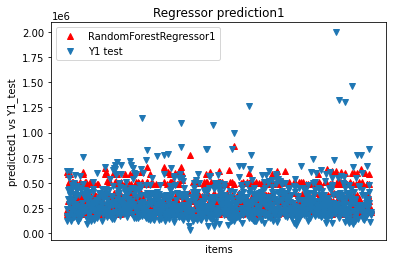

In [183]:
plt.figure()
plt.plot(prediction1, 'r^', label='RandomForestRegressor1')
plt.plot(Y1_test, 'v', label='Y1 test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction1')

plt.show()

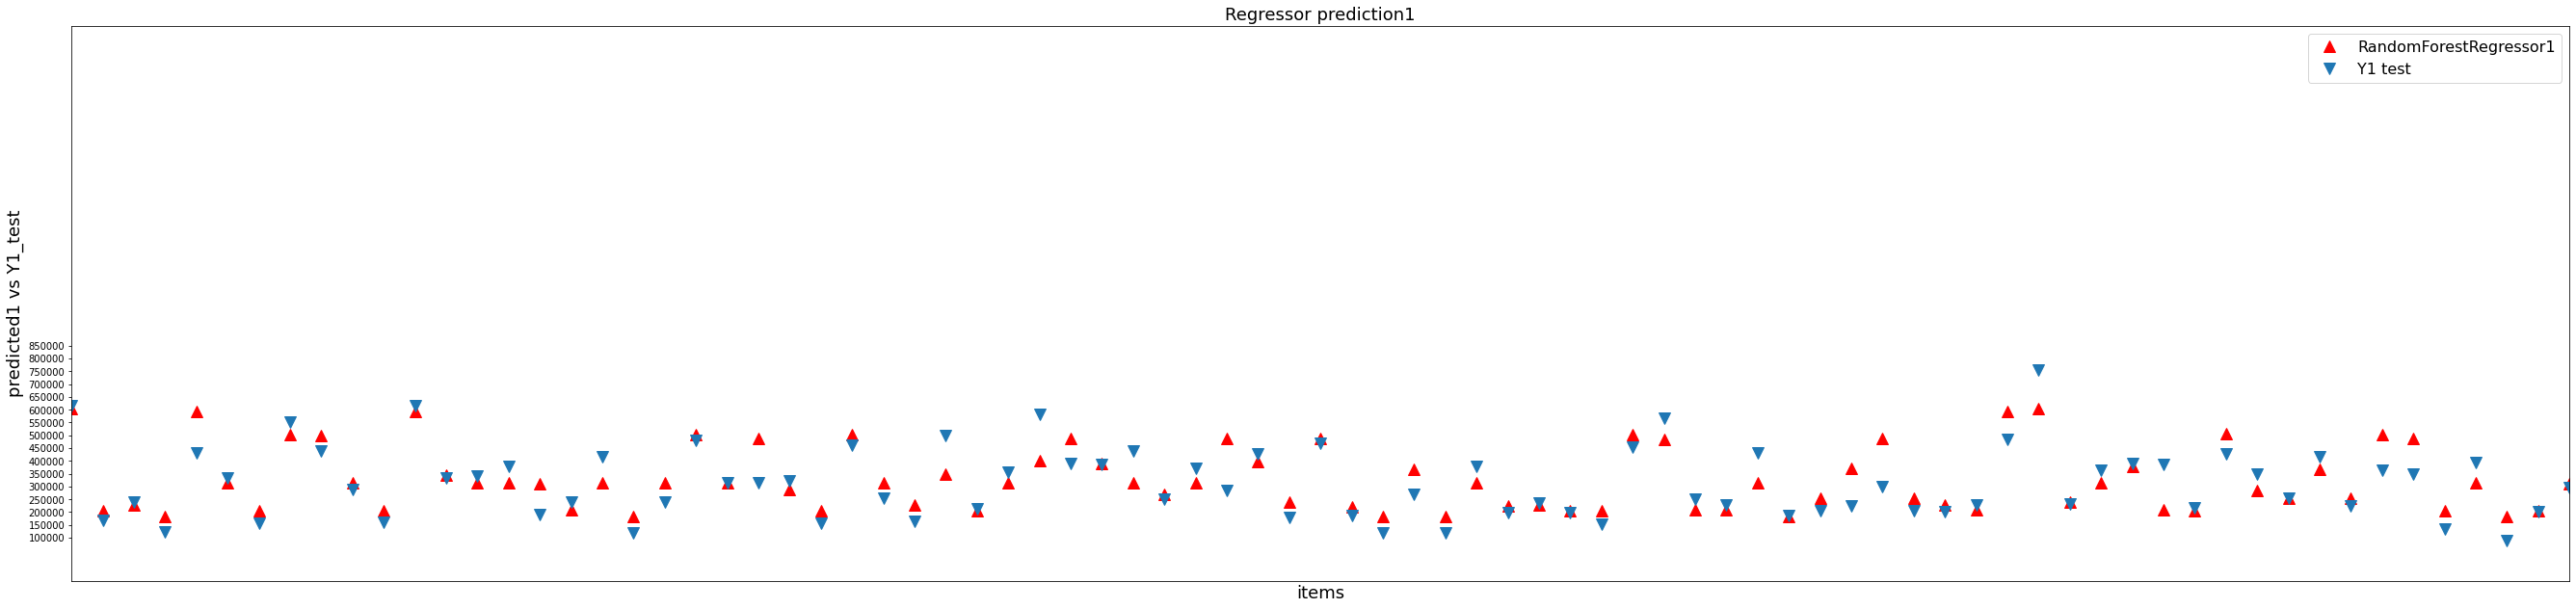

In [184]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000])
plt.yticks(np.arange(y.min(), y.max(), 50000))

axes.plot(prediction1, 'r^', label='RandomForestRegressor1',markersize=12)
axes.plot(Y1_test, 'v', label='Y1 test',markersize=12)
axes.set_xlim([0,80])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted1 vs Y1_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction1', fontsize=18)

plt.show()

In [185]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [186]:
mean_squared_error1=metrics.mean_squared_error(prediction1,Y1_test)
mean_squared_error1
root_mse1_2=pow(mean_squared_error1,0.5)
root_mse1_2

111478.96161692998

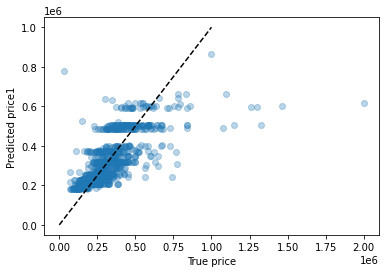

In [187]:
plt.scatter(Y1_test,prediction1,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price1')
plt.show()


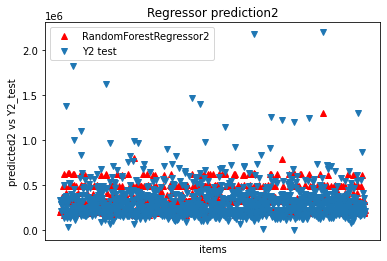

In [188]:
plt.figure()
plt.plot(prediction2, 'r^', label='RandomForestRegressor2')
plt.plot(Y2_test, 'v', label='Y2 test')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted2 vs Y2_test')
plt.xlabel('items')
plt.legend(loc="best")
plt.title('Regressor prediction2')

plt.show()


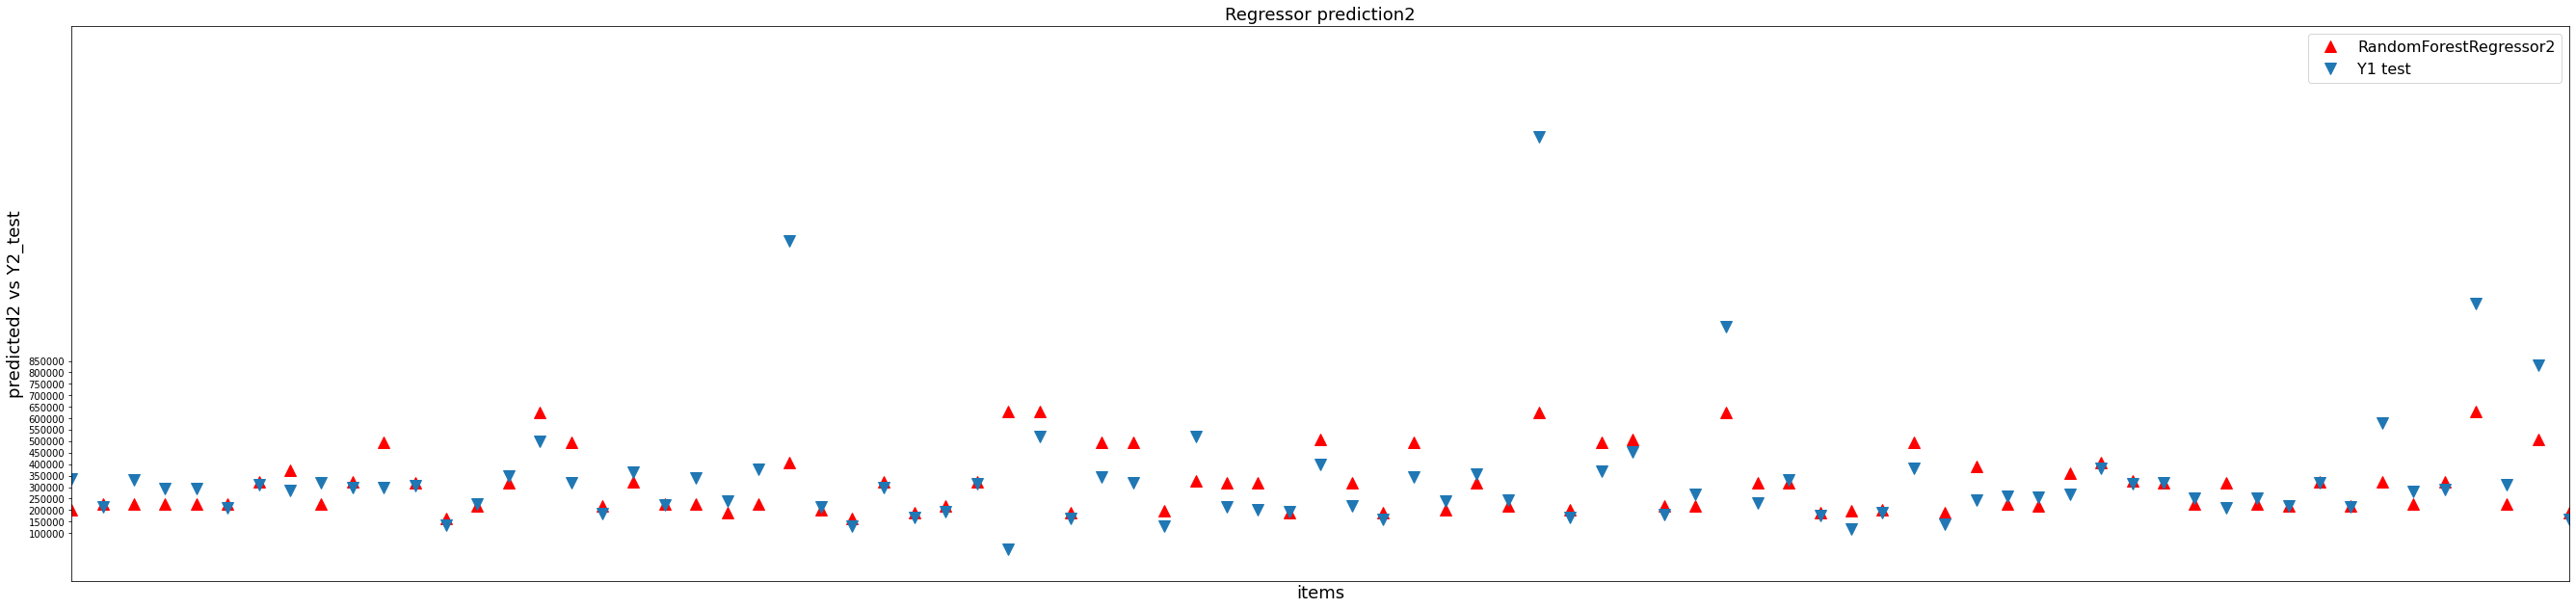

In [189]:
a= plt.figure()
axes= a.add_axes([0,0,6,2])#sequence of [left, bottom, width, height] quantities.
#axes= a.add_axes([0.2,0.2,8,8])
# adding axes
#x= np.arange(0,11)
#axes.plot(prediction, marker='*')
y = np.array([100000, 200000, 300000, 400000, 500000, 600000,700000,800000, 900000])
plt.yticks(np.arange(y.min(), y.max(), 50000))

axes.plot(prediction2, 'r^', label='RandomForestRegressor2',markersize=12)
axes.plot(Y2_test, 'v', label='Y1 test',markersize=12)
axes.set_xlim([0,80])
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted2 vs Y2_test', fontsize=18)
plt.xlabel('items', fontsize=18)
plt.legend(loc="best",prop={'size': 16})
plt.title('Regressor prediction2', fontsize=18)

plt.show()

In [190]:
mean_squared_error2=metrics.mean_squared_error(prediction2,Y2_test)
mean_squared_error2
root_mse2_2=pow(mean_squared_error2,0.5)
root_mse2_2

134923.5613930848

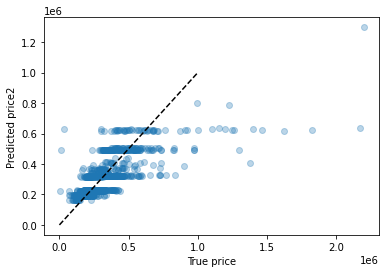

In [191]:
plt.scatter(Y2_test,prediction2,alpha=0.3)
plt.plot([0,1000000],[0,1000000],'--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price2')
plt.show()